# Age distribution in the urban clusters

In [45]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from src.config import URBAN_CLUSTER_FILE, AGE_COLUMNS, YEARS, CLUSTER_LABELS
from src.data.loader import DataLoader


warnings.filterwarnings("ignore")
# sns.set_style("whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
loader = DataLoader(URBAN_CLUSTER_FILE)

In [64]:
def plot_age_dist(loader, cluster=None):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True, sharex=True)
    axes = axes.flatten()  # Flatten to make indexing (0, 1, 2, 3) easier

    for i, year in enumerate(YEARS):
        ax = axes[i]
        
        try:
            df_year = loader.get_data_for_year(year)

            if df_year.empty:
                ax.text(0.5, 0.5, f"No Data for {year}", ha='center', fontsize=14)
                continue
            
            if cluster is not None:
                df_year = df_year[df_year["cluster_urban"] == cluster]
            
            df_year["total_pop"] = df_year[AGE_COLUMNS].sum(axis=1)
            total_population = df_year['total_pop'].sum()
            age_counts = df_year[AGE_COLUMNS]
            total_age_counts = age_counts.sum()
            age_distribution_pct = (total_age_counts / total_population) * 100


            bars = ax.bar(age_distribution_pct.index, age_distribution_pct.values, 
                        color='skyblue', edgecolor='black')

            ax.set_title(f'Age Distribution ({year})')
            ax.set_xlabel('Age Group')
            ax.set_ylabel('Percentage of Total Population (%)')
            ax.grid(axis='y', linestyle='--', alpha=0.7)

            # Add percentage labels on top of the bars
            for bar in bars:
                yval = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, 
                        f'{yval:.1f}%', ha='center', va='bottom')
            
            # Add total variance annotation
            ax.text(0.05, 0.95, f"Total Population: {total_population:,.0f}", 
                    transform=ax.transAxes, ha='left', va='top', fontsize=10, 
                    bbox=dict(facecolor='white', alpha=0.8))

        except Exception as e:
            ax.text(0.5, 0.5, f"Error: {str(e)}", ha='center', color='red')

    title = CLUSTER_LABELS["cluster_urban"].get(cluster) if cluster is not None else "Portugal"

    fig.suptitle(f"Age distribution in {title} throughout 2020-2023", fontsize=20)
    plt.tight_layout()
    plt.show()

## Age distribution in the Rural cluster (Cluster 0)

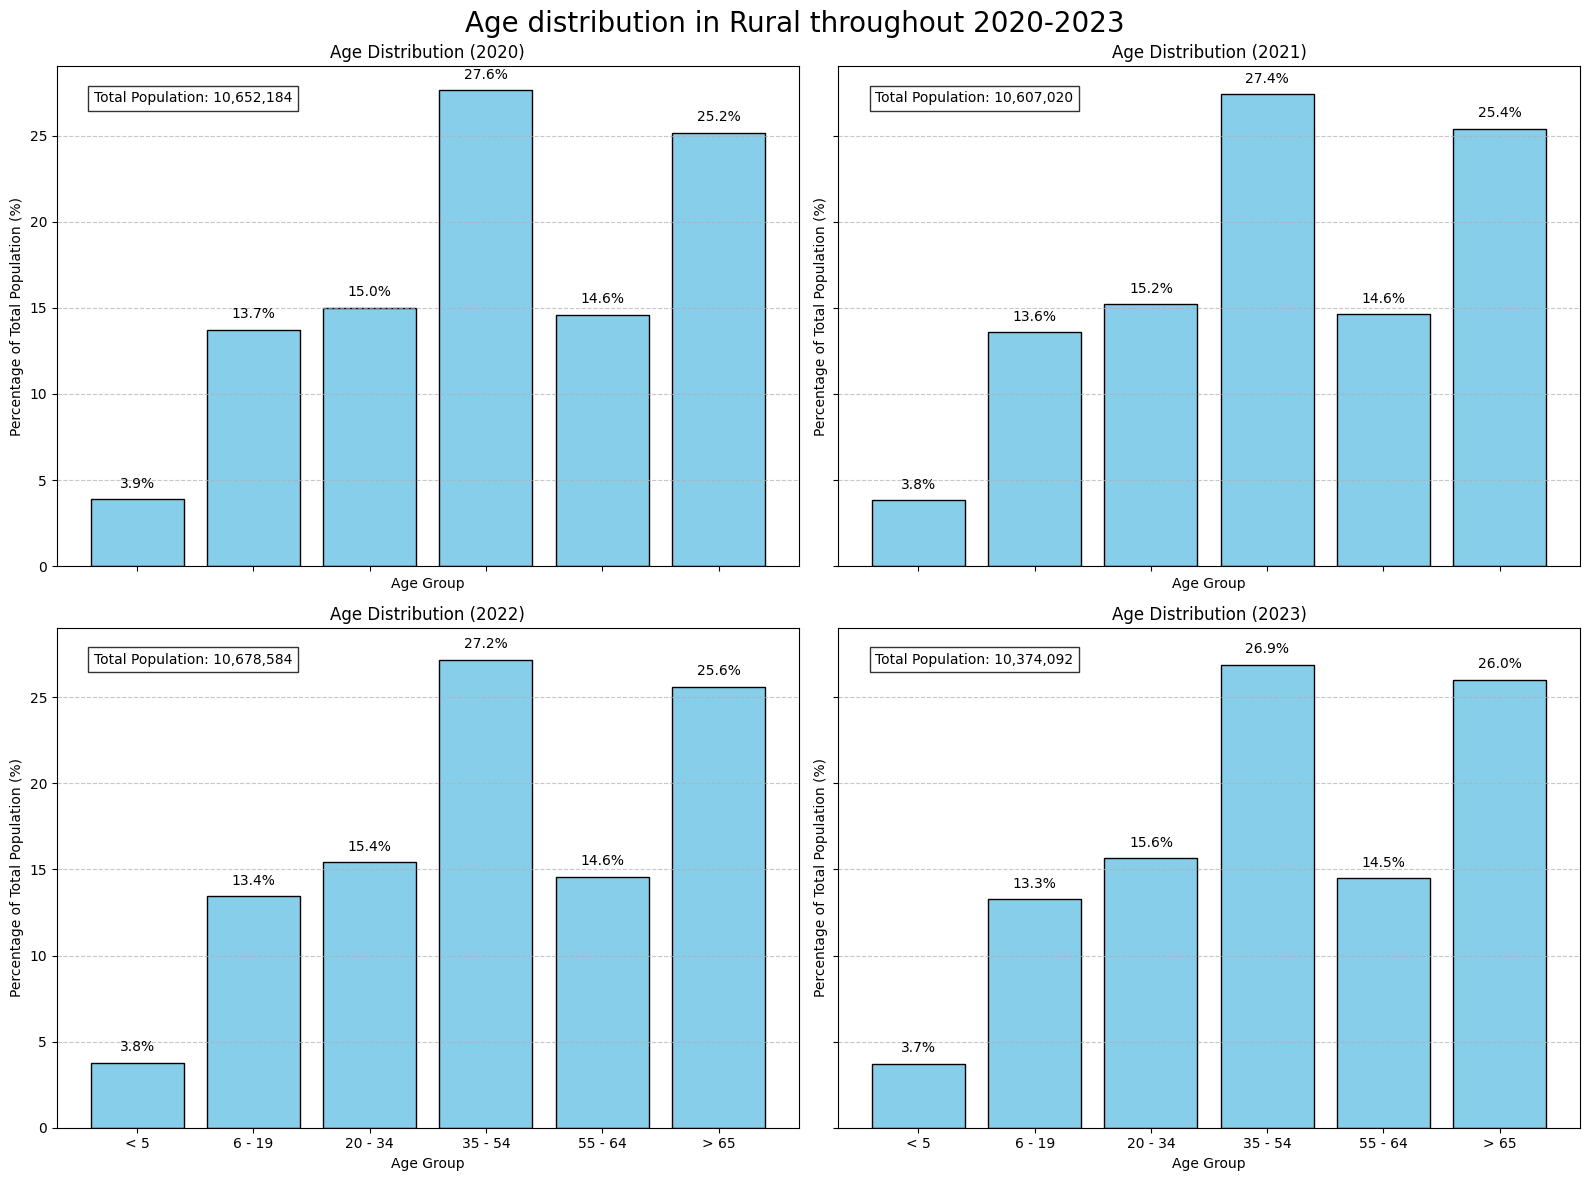

In [65]:
plot_age_dist(loader=loader, cluster=0)

## Age disrtibution in Suburbs cluster (Cluster 1)

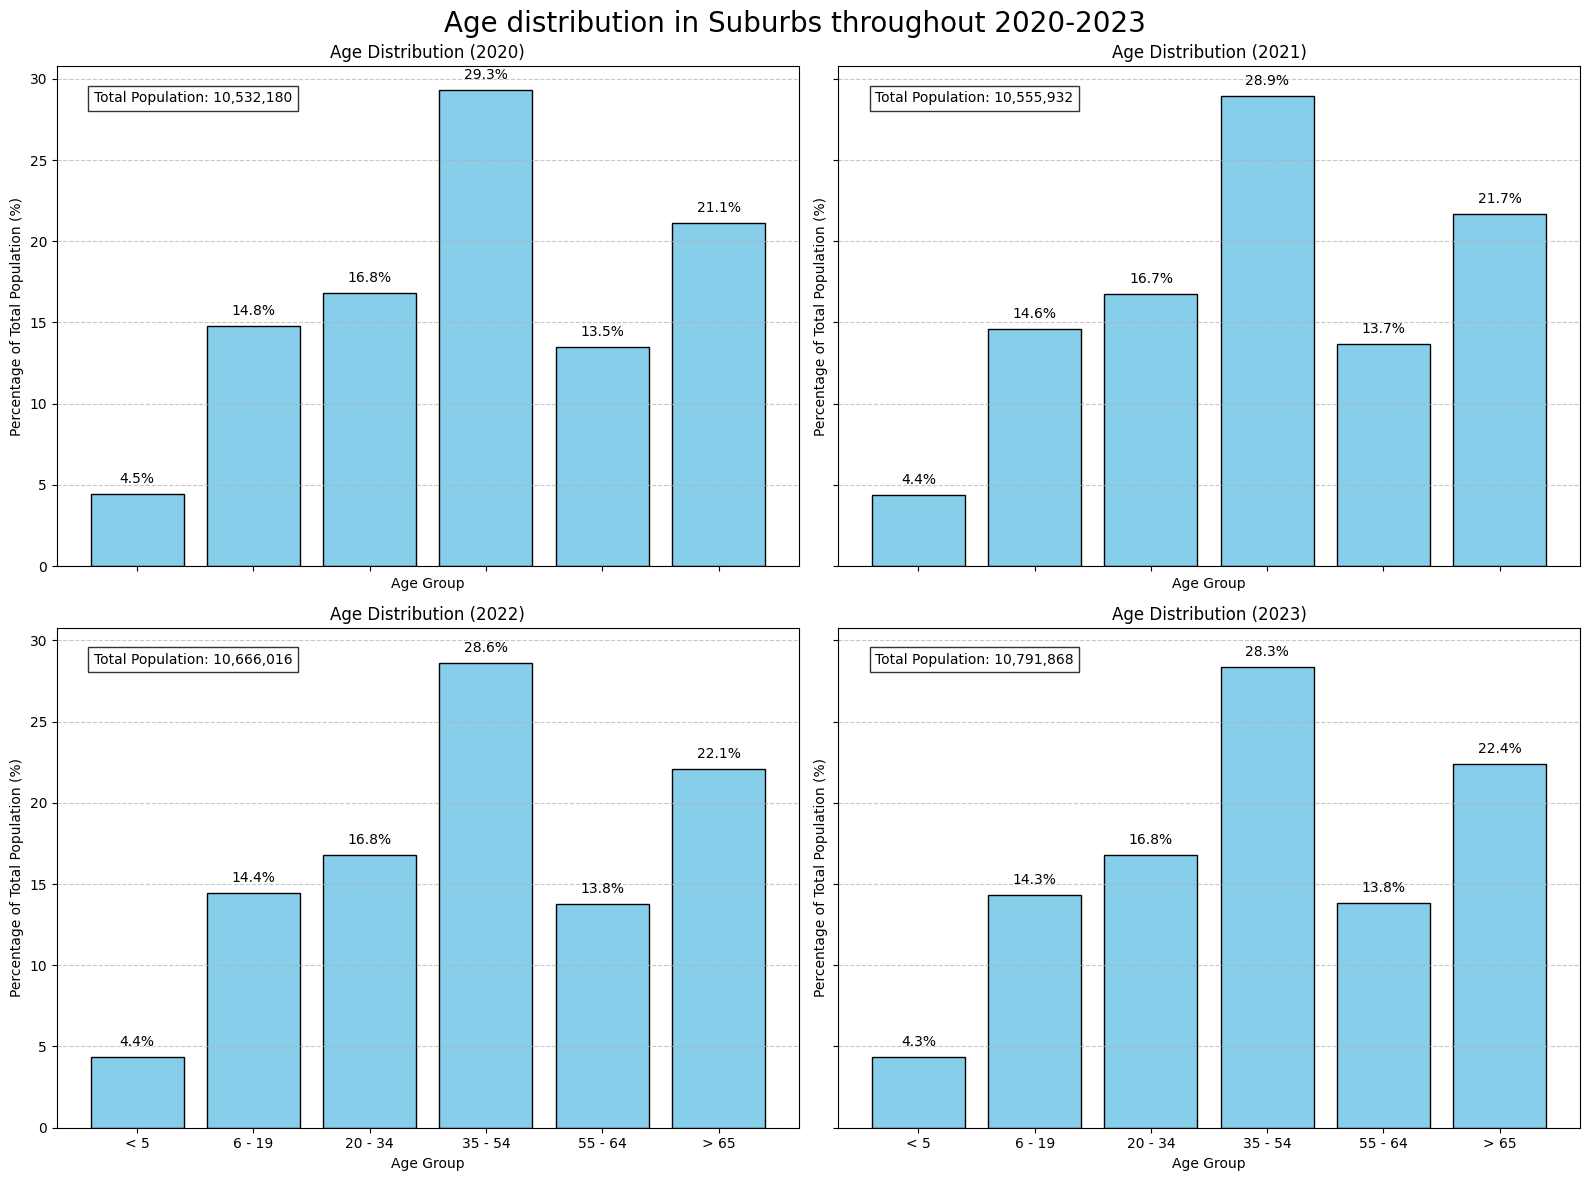

In [66]:
plot_age_dist(loader=loader, cluster=1)

## Age distribution in Urban cluster (Cluster 4) 

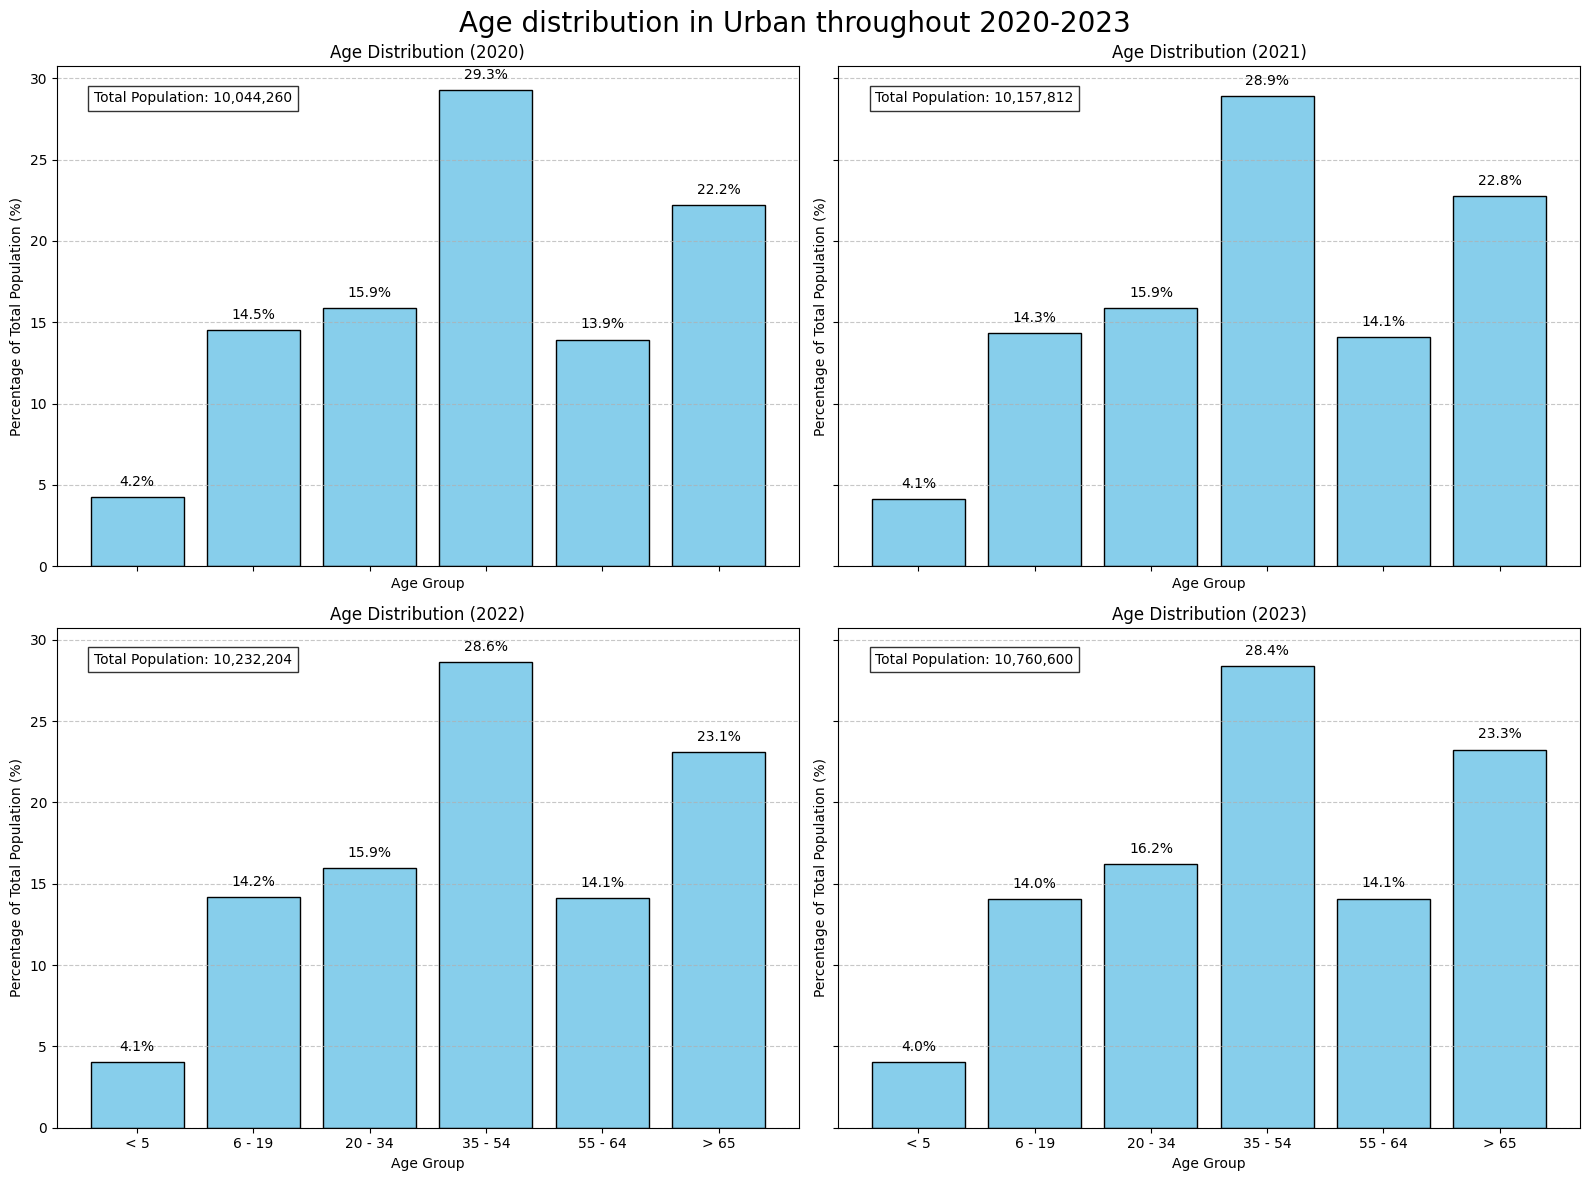

In [67]:
plot_age_dist(loader=loader, cluster=4)

## Age distribution in Porto and Lisbon (Clusters 2 and 3 combined)

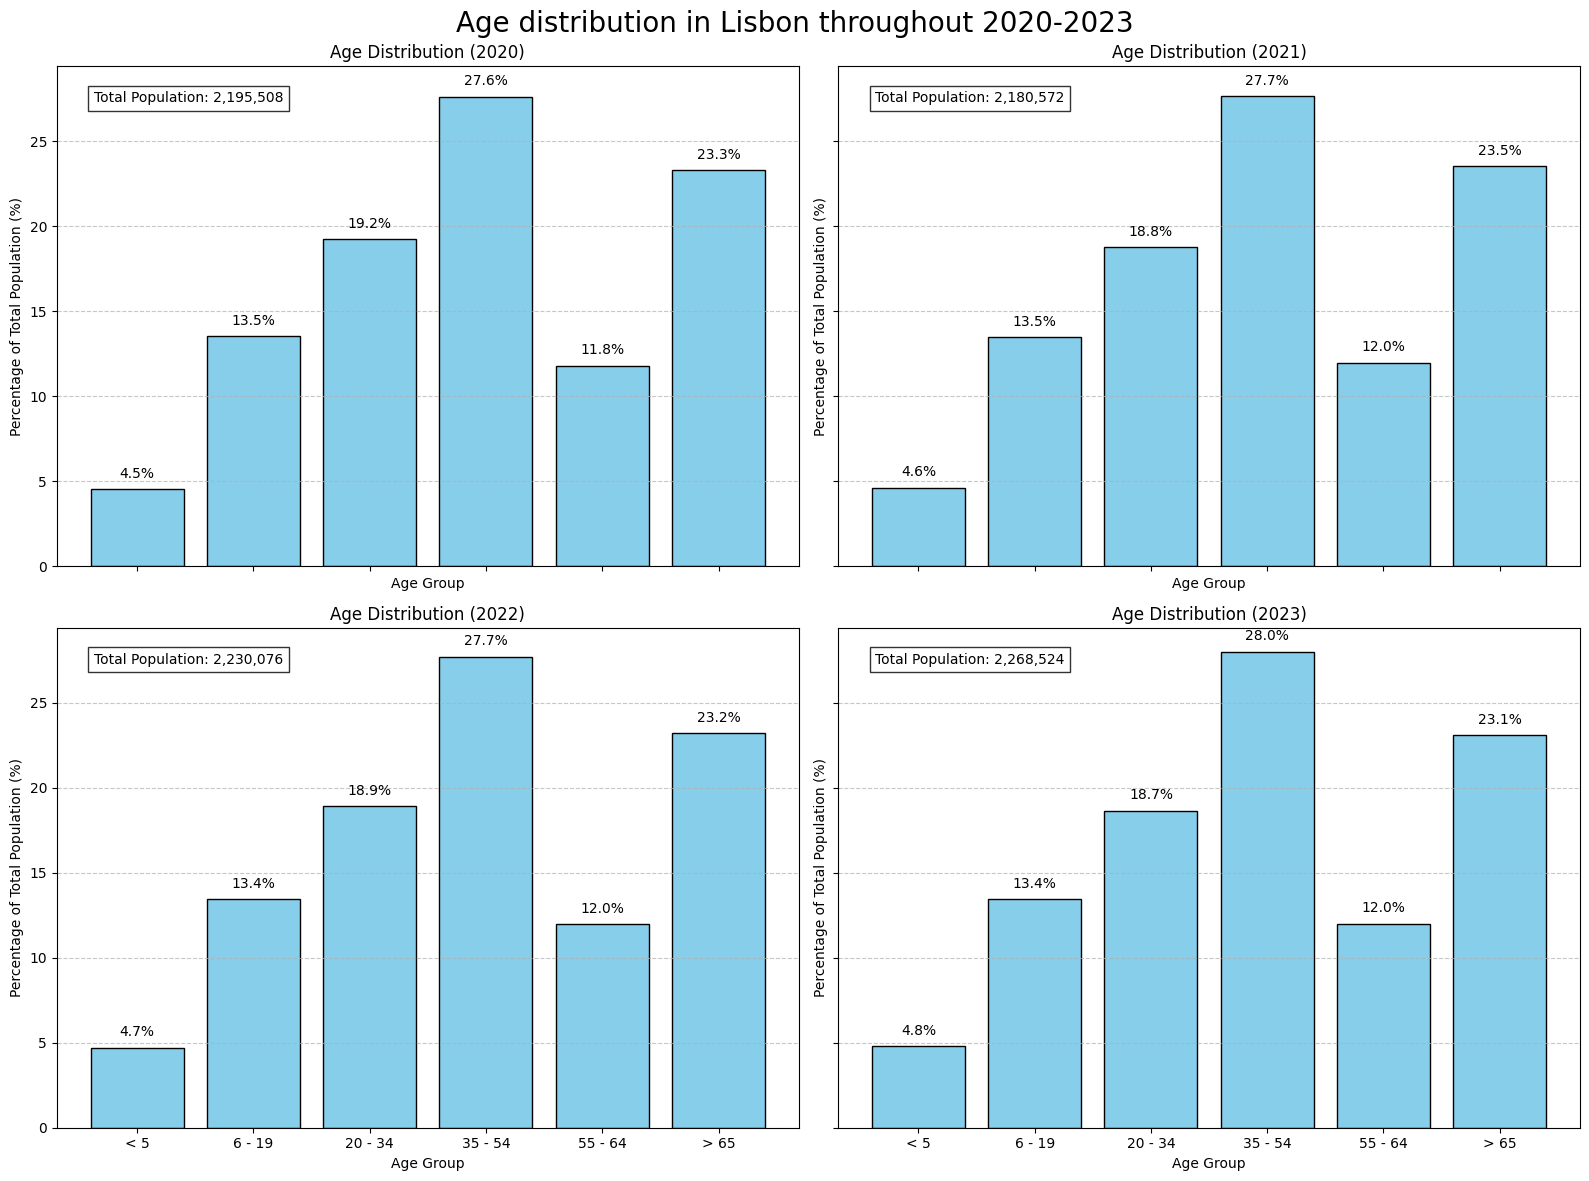

In [68]:
plot_age_dist(loader=loader, cluster=2)

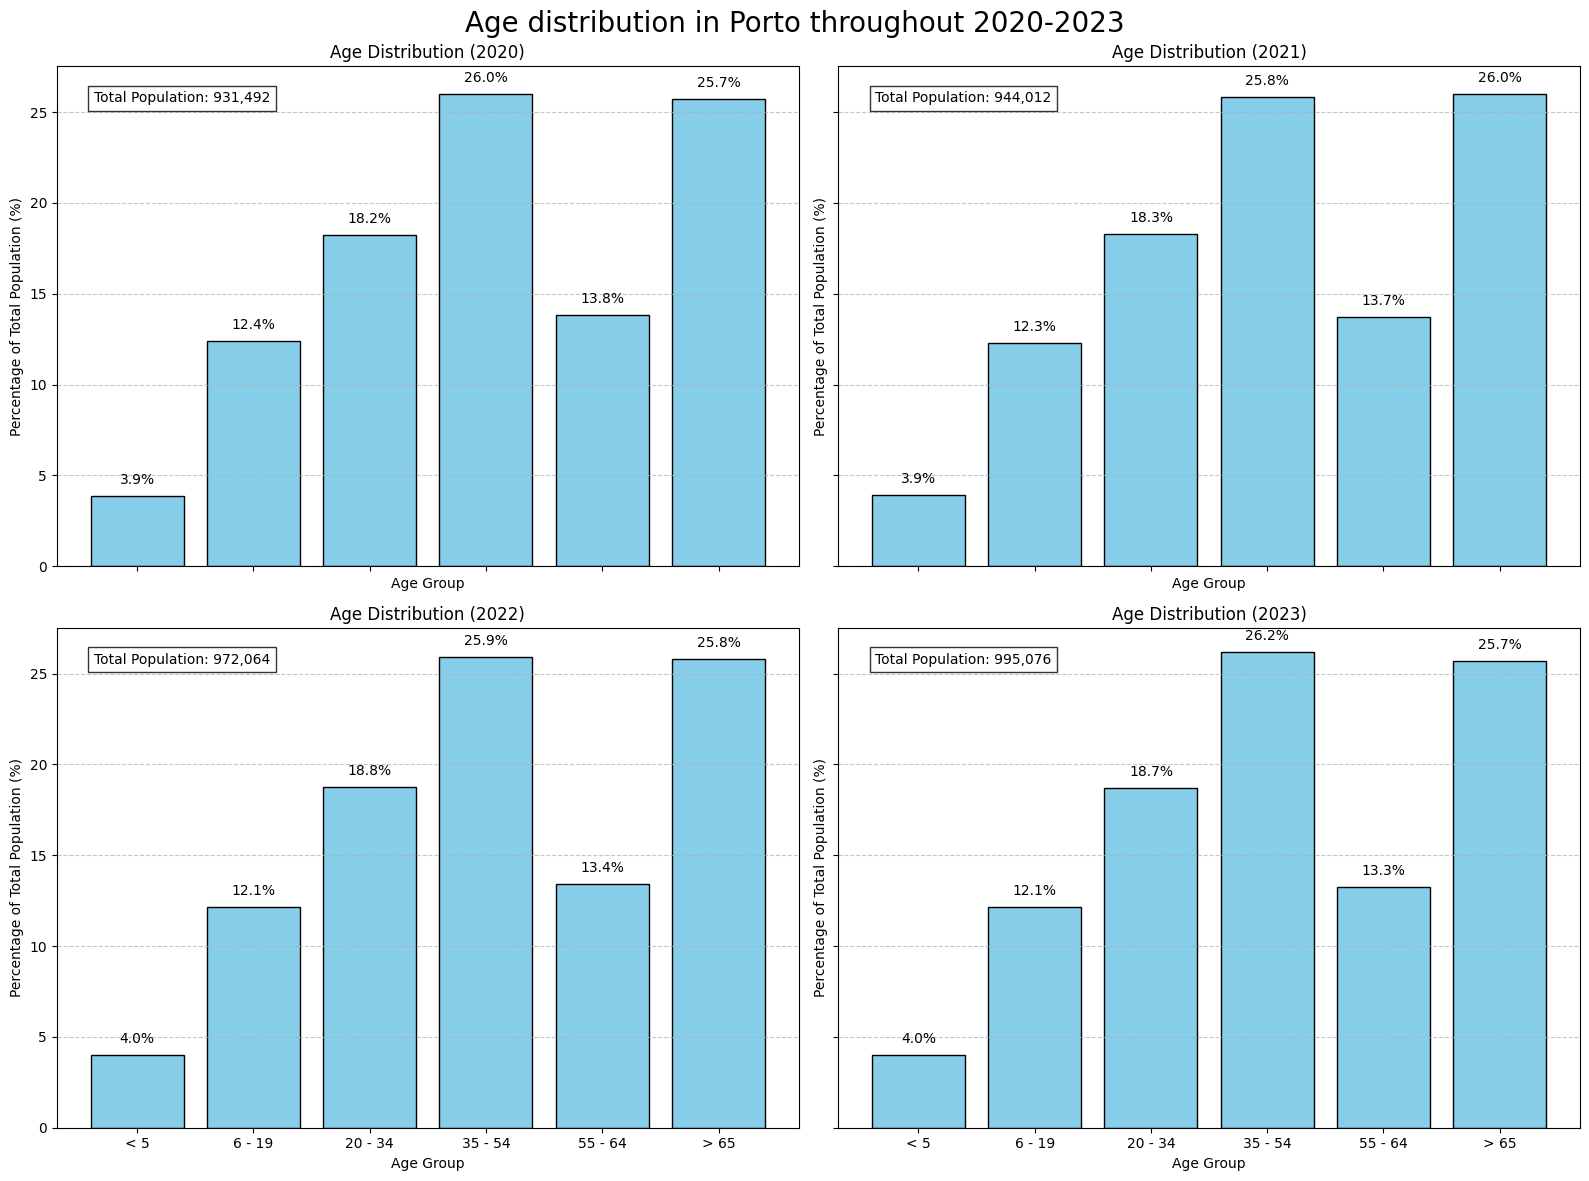

In [69]:
plot_age_dist(loader=loader, cluster=3)

## Comparison of the age distribution for the 2022 year among clusters

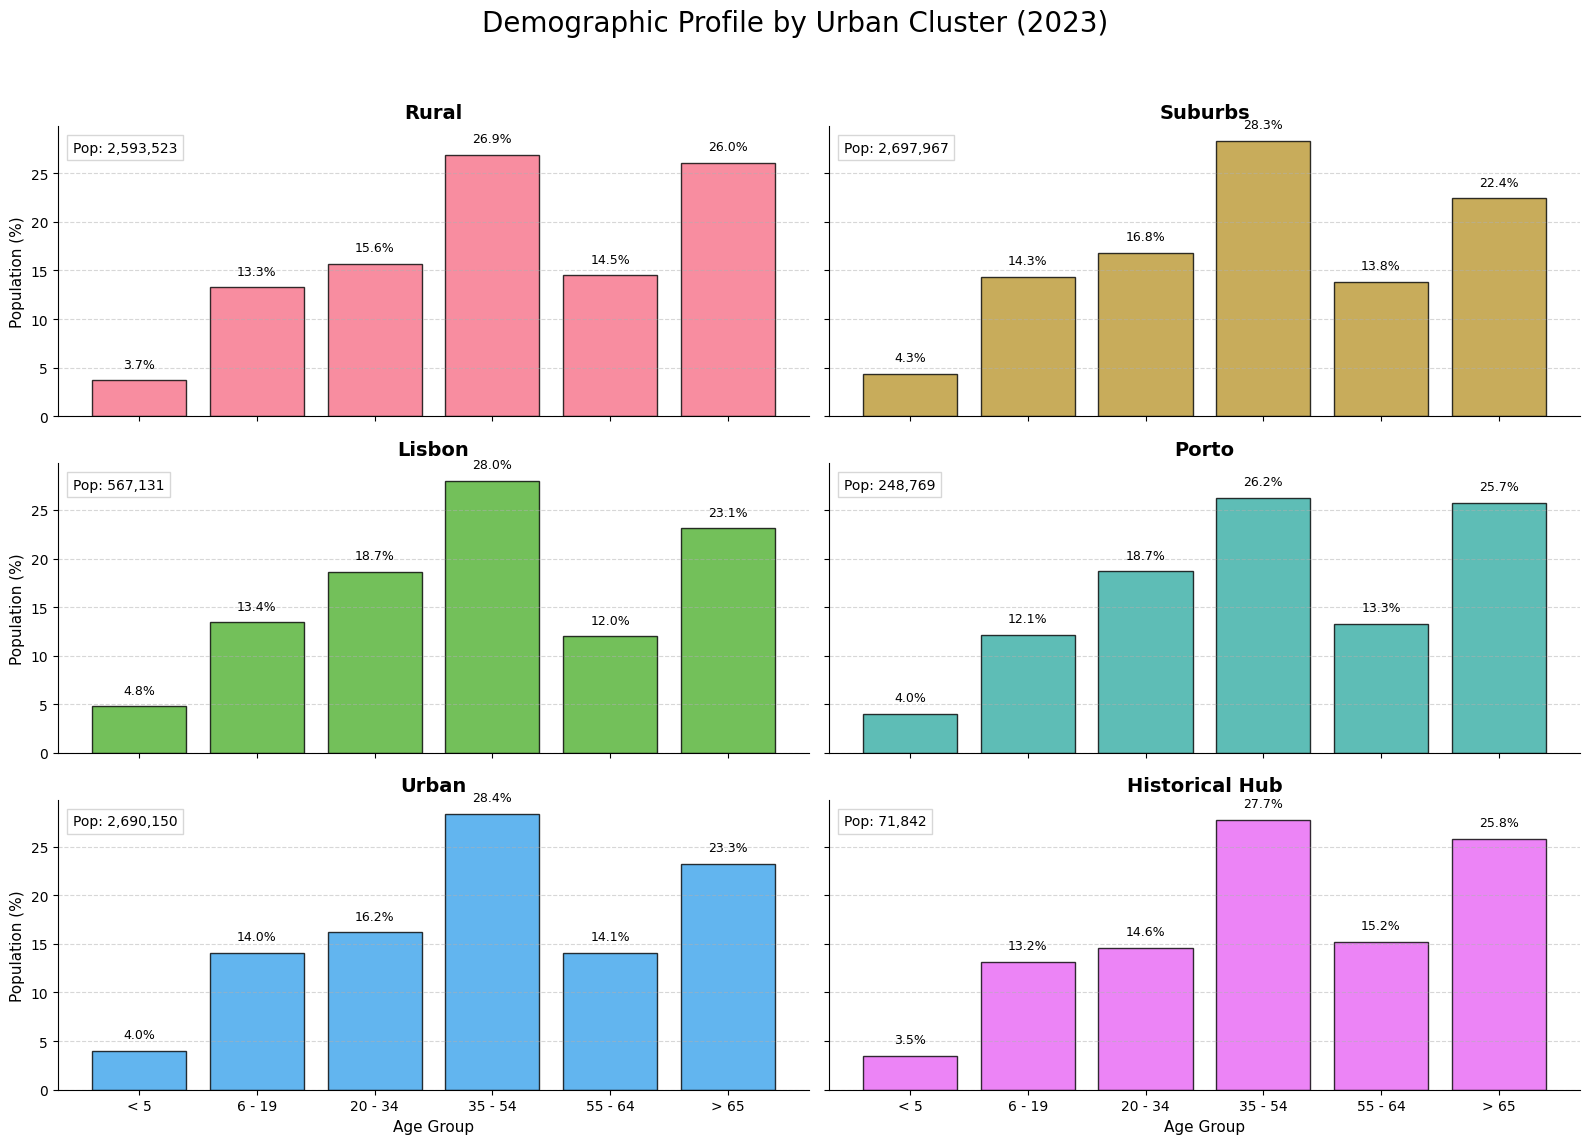

In [91]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharey=True, sharex=True)
axes = axes.flatten()  # Flatten to make indexing (0, 1, 2, 3) easier

# Define a distinct color for each cluster
palette = sns.color_palette("husl", len(CLUSTER_LABELS["cluster_urban"]))
cluster_colors = {k: palette[i] for i, k in enumerate(CLUSTER_LABELS["cluster_urban"].keys())}

# Fixed Year for this specific view
target_year = 2023

for i, cluster in enumerate(CLUSTER_LABELS["cluster_urban"].keys()):
    ax = axes[i]
    cluster_name = CLUSTER_LABELS["cluster_urban"][cluster]

    
    try:
        df_year = loader.get_data_for_year(year=target_year)

        if df_year.empty:
            ax.text(0.5, 0.5, f"No Data for {target_year}", ha='center', fontsize=14)
            continue

        df_cluster = df_year[df_year["cluster_urban"] == cluster].copy()

        df_cluster["total_pop"] = df_cluster[AGE_COLUMNS].sum(axis=1)
        total_population = df_cluster['total_pop'].sum()
        age_counts = df_cluster[AGE_COLUMNS]
        total_age_counts = age_counts.sum()
        age_distribution_pct = (total_age_counts / total_population) * 100

        color = cluster_colors.get(cluster, 'salmon')
        bars = ax.bar(age_distribution_pct.index, age_distribution_pct.values, 
                      color=color, edgecolor='black', alpha=0.8)
        ax.set_title(f'{cluster_name}', fontsize=14, fontweight='bold')
        ax.grid(axis='y', linestyle='--', alpha=0.5)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        if i % 2 == 0: # Left columns
            ax.set_ylabel('Population (%)', fontsize=11)
        if i >= 4: # Bottom rows
            ax.set_xlabel('Age Group', fontsize=11)

        # Add percentage labels on bars
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 1, 
                    f'{yval:.1f}%', ha='center', va='bottom', fontsize=9)
        
        # Add Total Population annotation (Top Left)
        ax.text(0.02, 0.95, f"Pop: {total_population/4:,.0f}", 
                transform=ax.transAxes, ha='left', va='top', fontsize=10, 
                bbox=dict(facecolor='white', edgecolor='lightgray', alpha=0.9))

    except Exception as e:
        ax.text(0.5, 0.5, f"Error: {str(e)}", ha='center', color='red')

fig.suptitle(f"Demographic Profile by Urban Cluster ({target_year})", fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()